In [126]:
#Load the model
import json
import numpy as np
from PIL import Image
import tensorflow.lite as tflite

In [127]:
MODELS_DIR = '../models'
MODEL_NAME='final_classification_model.keras'
TFLITE_MODEL_NAME='classification_model.tflite'
#file with classes
CLASSES_JSON = 'class_indices.json'
TARGET_SIZE = (320, 320)

In [128]:
#Load model
model_file_path=f'{MODELS_DIR}/{MODEL_NAME}'
model = keras.models.load_model(model_file_path)
print("Model loaded...")

Model loaded...


In [129]:
#load classes from json file
classes_json_path=f'{MODELS_DIR}/{CLASSES_JSON}'
class_indices={}
with open(classes_json_path, 'r') as json_file:
    class_indices = json.load(json_file)
print("Class indices loaded...")

Class indices loaded...


## Running predictions for items that the model classifies well

In [130]:
def prepare_input(image_path):
    with Image.open(image_path, 'r') as img:
        img = img.resize((TARGET_SIZE), Image.NEAREST)
    x = np.array(img, dtype='float32')
    X = np.array([x])
    return preprocess_input(X)

In [131]:
def preprocess_input(x):
        x /= 127.5
        x -= 1.0
        return x

In [132]:
def predict(interpreter, X):
    input_index = interpreter.get_input_details()[0]['index']
    output_index =interpreter.get_output_details()[0]['index']
    interpreter.set_tensor(input_index, X)
    interpreter.invoke()
    return interpreter.get_tensor(output_index)

In [133]:
def decode_predictions(preds, class_indices):
    predictions=preds[0]
    #order in descendent order
    sorted_indices = np.argsort(predictions)[::-1]  

    top_n = 5
    top_classes = []
    top_scores = []

    index_to_class = {index: label for label, index in class_indices.items()}

    for i in range(top_n):
        index = sorted_indices[i]
        class_label = index_to_class[index] 
        score = predictions[index]
        top_classes.append((class_label, score))

    return top_classes
    

In [134]:
converter = tflite.TFLiteConverter.from_keras_model(model) 
tflite_model= converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmphwis_58m/assets


INFO:tensorflow:Assets written to: /tmp/tmphwis_58m/assets


Saved artifact at '/tmp/tmphwis_58m'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 320, 320, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 128), dtype=tf.float32, name=None)
Captures:
  139708846586960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139708846585808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139708846581584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139708846584656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139708846586384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139708846586192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139708847291088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139708847289744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139708847291664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139708847289936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13970884729

W0000 00:00:1736132216.042235  832479 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1736132216.042276  832479 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-01-05 21:56:56.042449: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmphwis_58m
2025-01-05 21:56:56.052547: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-01-05 21:56:56.052567: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmphwis_58m
2025-01-05 21:56:56.156390: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-01-05 21:56:56.835915: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmphwis_58m
2025-01-05 21:56:57.063680: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 1021233 microseconds.


In [135]:
tflite_model_path=f'{MODELS_DIR}/{TFLITE_MODEL_NAME}'
with open(tflite_model_path,'wb') as f_out:
    f_out.write(tflite_model)
print (f"Tensor flow lite model saved as: {tflite_model_path}")

Tensor flow lite model saved as: ../models/classification_model.tflite


In [136]:
interpreter = tflite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

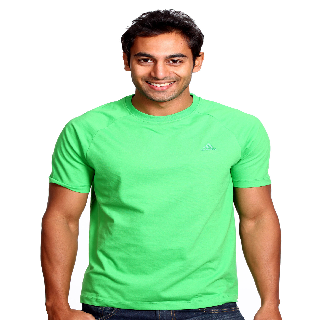

In [137]:
image_path='../dataset/test-images/2241.jpg'
img=load_img(image_path, target_size=TARGET_SIZE)
img

In [138]:
preds = predict(interpreter, prepare_input(image_path))
top_predictions = decode_predictions(preds, class_indices)
print("Top 5 Predictions:")
for class_label, score in top_predictions:
    print(f"{class_label}: {score:.4f}")

Top 5 Predictions:
Tshirts: 0.9991
Innerwear Vests: 0.0008
Shirts: 0.0000
Sweaters: 0.0000
Tops: 0.0000


In [139]:
# Running prediction for a second image

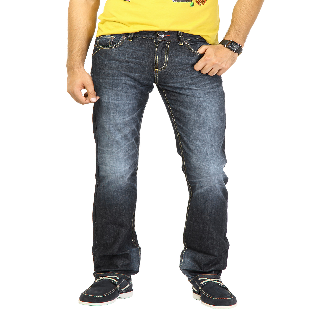

In [140]:
image_path='../dataset/test-images/11330.jpg'
img=load_img(image_path, target_size=TARGET_SIZE)
img

In [141]:
preds = predict(interpreter, prepare_input(image_path))
top_predictions = decode_predictions(preds, class_indices)
print("Top 5 Predictions:")
for class_label, score in top_predictions:
    print(f"{class_label}: {score:.4f}")

Top 5 Predictions:
Jeans: 0.9998
Trousers: 0.0001
Jeggings: 0.0001
Capris: 0.0000
Tshirts: 0.0000


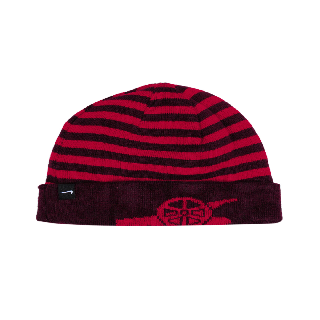

In [142]:
image_path='../dataset/test-images/22633.jpg'
img=load_img(image_path, target_size=TARGET_SIZE)
img

In [143]:
preds = predict(interpreter, prepare_input(image_path))
top_predictions = decode_predictions(preds, class_indices)
print("Top 5 Predictions:")
for class_label, score in top_predictions:
    print(f"{class_label}: {score:.4f}")

Top 5 Predictions:
Caps: 1.0000
Trunk: 0.0000
Backpacks: 0.0000
Skirts: 0.0000
Wallets: 0.0000


## Running predictions for images of articles that the model doesnt recognize correctly

In [144]:
image_path='../dataset/test-images/54558.jpg'

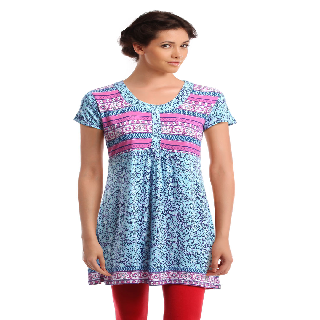

In [145]:
img=load_img(image_path, target_size=TARGET_SIZE)
img

In [146]:
preds = predict(interpreter, prepare_input(image_path))
top_predictions = decode_predictions(preds, class_indices)
print("Top 5 Predictions:")
for class_label, score in top_predictions:
    print(f"{class_label}: {score:.4f}")

Top 5 Predictions:
Kurtas: 0.6848
Tunics: 0.2263
Kurtis: 0.0746
Night suits: 0.0034
Tops: 0.0025


In [147]:
#Even when the highest prediction doesnt correspond to "Tunic", that was the expected classification, the model classifies the item
# as "Kurtas" and a kurta is actually a type of tunic (besides that, the second most probable class assigned by the model is "Tunics")

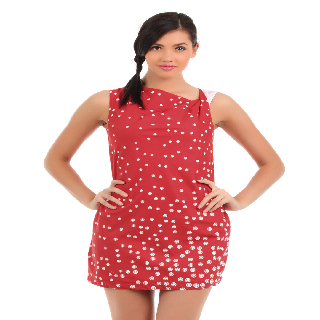

In [148]:
image_path='../dataset/test-images/57199.jpg'
img=load_img(image_path, target_size=TARGET_SIZE)
img

In [149]:
preds = predict(interpreter, prepare_input(image_path))
top_predictions = decode_predictions(preds, class_indices)
print("Top 5 Predictions:")
for class_label, score in top_predictions:
    print(f"{class_label}: {score:.4f}")

Top 5 Predictions:
Dresses: 0.5369
Nightdress: 0.3682
Tunics: 0.0532
Kurtas: 0.0107
Bath Robe: 0.0084


In [150]:
#This item is classified in the dataset as "Tunics", but it actually looks like a Dress and the model classifies it as such.
#(notice that 'Tunics' is the 4th option, so at least the model recognizes that it somehow looks like a tunic)